Let's import useful packages.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import pyplot as plt
from matplotlib import style
style.use(style='seaborn-whitegrid')

In [3]:
from sklearn.linear_model import SGDRegressor

In [4]:
import numpy as np
import seaborn as sns
import scipy as sp

Angles in the ellipse.

In [5]:
def angles_in_ellipse(num, a, b):
    """
    This function returns the angles.
    """
    assert(num > 0)
    assert(a < b)
    
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

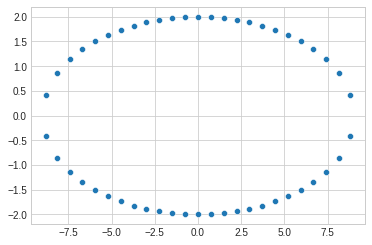

In [6]:
a = 2
b = 9
num = 50

phi = angles_in_ellipse(num=num, a=a, b=b)
X = b * np.sin(phi)
y = a * np.cos(phi)

plt.figure(figsize=(6, 4))
sns.scatterplot(x=X, y=y)
plt.show()

SGD Regression.

In [7]:
def fit_regressor(X,
                  y,
                  alpha,
                  loss='squared_error',
                  eta0=0.001,
                  learning_rate='constant',
                  random_state=0):
    """
    This function fits the SGDRegressor.
    """
    clf = SGDRegressor(loss=loss,
                       alpha=alpha,
                       eta0=eta0,
                       learning_rate=learning_rate,
                       random_state=random_state)
    clf = clf.fit(X=X, y=y)
    
    coeffs = clf.coef_
    intercept = clf.intercept_
    pred = clf.predict(X=X)
    return pred

Plot for different regularizors.

In [8]:
def obtain_grid_plot(a, b, loss, regparams, outliers, num=50):
    """
    This function plots the grid plot.
    """
    plt.figure(figsize=(25, 20))
    title = "Alpha: {} | Outlier: {}"
    phi = angles_in_ellipse(num=num, a=a, b=b)
    outs = len(outliers)
    params = len(regparams)
    pi = 1
    
    for alpha in regparams:
        X = b * np.sin(phi)
        y = a * np.cos(phi)
        out_x = list()
        out_y = list()
        
        for outlier in outliers:
            out_x.append(outlier[0])
            out_y.append(outlier[1])
            X = np.append(arr=X, values=[outlier[0]])
            y = np.append(arr=y, values=[outlier[1]])
            X = X.reshape(-1, 1)
            y = y.reshape(-1, 1)
            
            pred = fit_regressor(X=X, y=y, alpha=alpha, loss=loss)
            
            plt.subplot(params, outs, pi)
            plt.title(label=title.format(alpha, outlier))
            plt.scatter(x=X, y=y, label='Data')
            plt.scatter(x=out_x, y=out_y, color='red', label='Outlier')
            plt.plot(X, pred, color='green', label='Model')
            plt.legend()
            
            pi += 1
    
    plt.show()
    return None

In [9]:
regparams = [0.0001, 1, 100]
outliers = [(0, 2), (21, 13), (-23, -15), (22, 14), (23, 14)]

---

__`loss = 'squared_error'`__

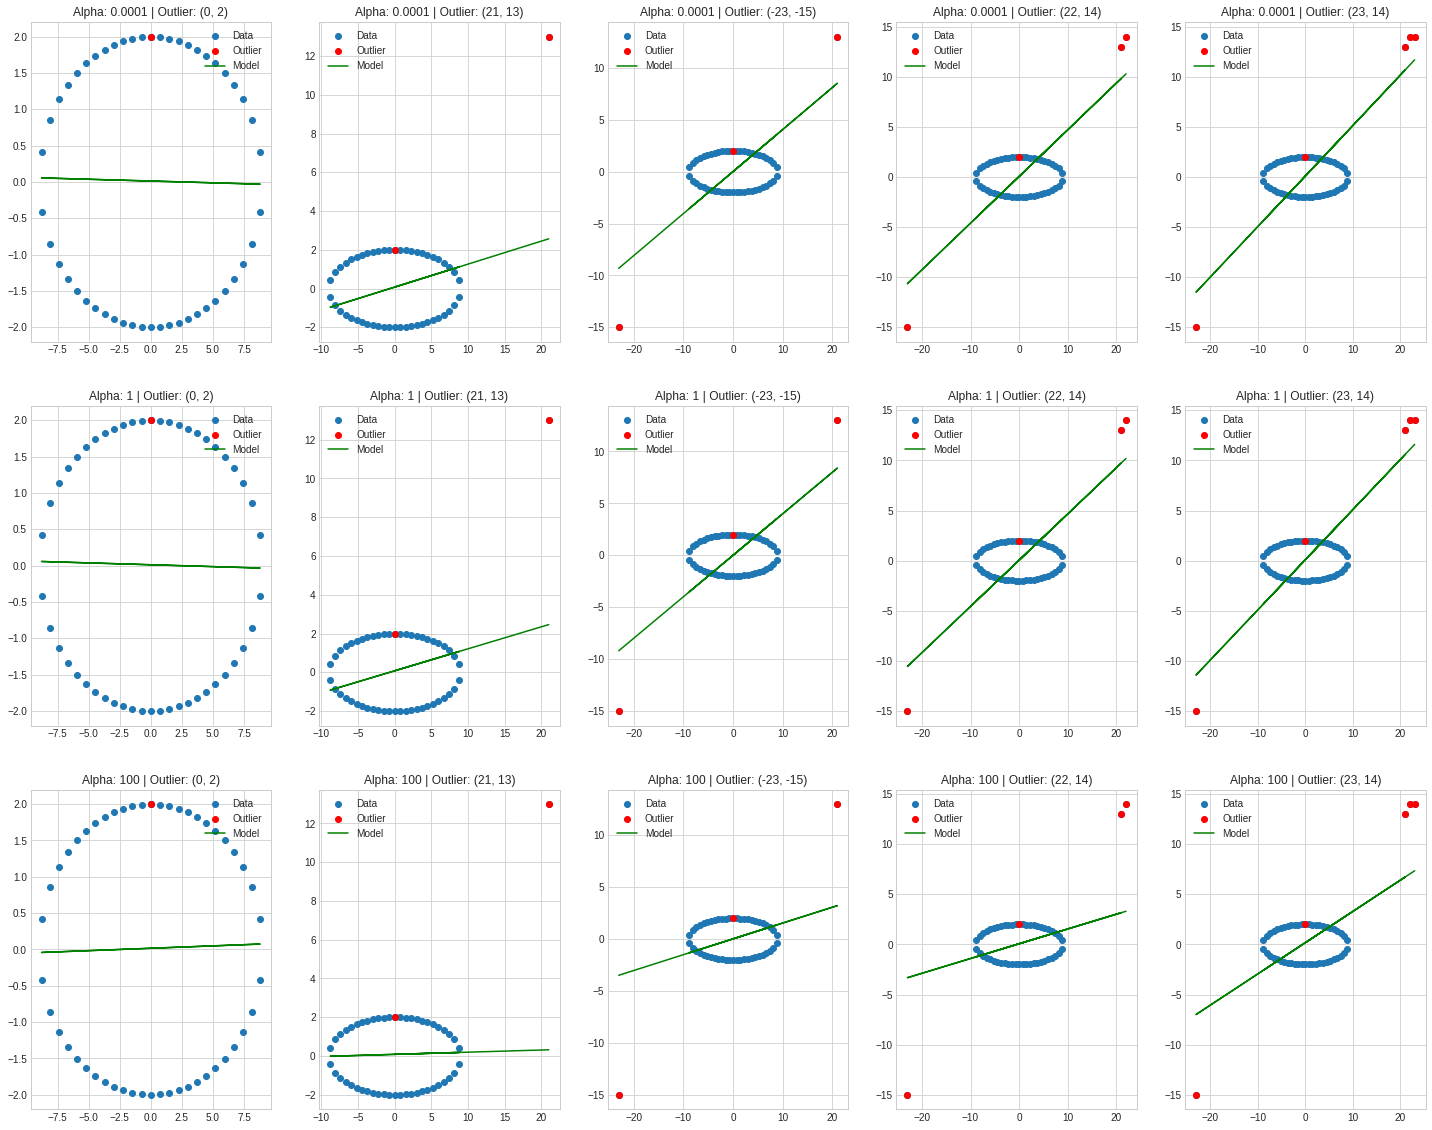

In [10]:
obtain_grid_plot(a=2, b=9, regparams=regparams, outliers=outliers, loss='squared_error')

__Conclusion:__

In the plot, the red points are outliers, the green line is a learning model and the blue points are acutal datapoints.

When we use `squared_error` as our loss, we see that the hyperplane is getting __highly__ influenced by outliers.

The outlier points which are in the corners of the plot, impacts the learning model which results in different weight values.

In this case, even the regularizing parameter `alpha` is not holding the tight grip against outliers.

---

__`loss = 'huber'`__

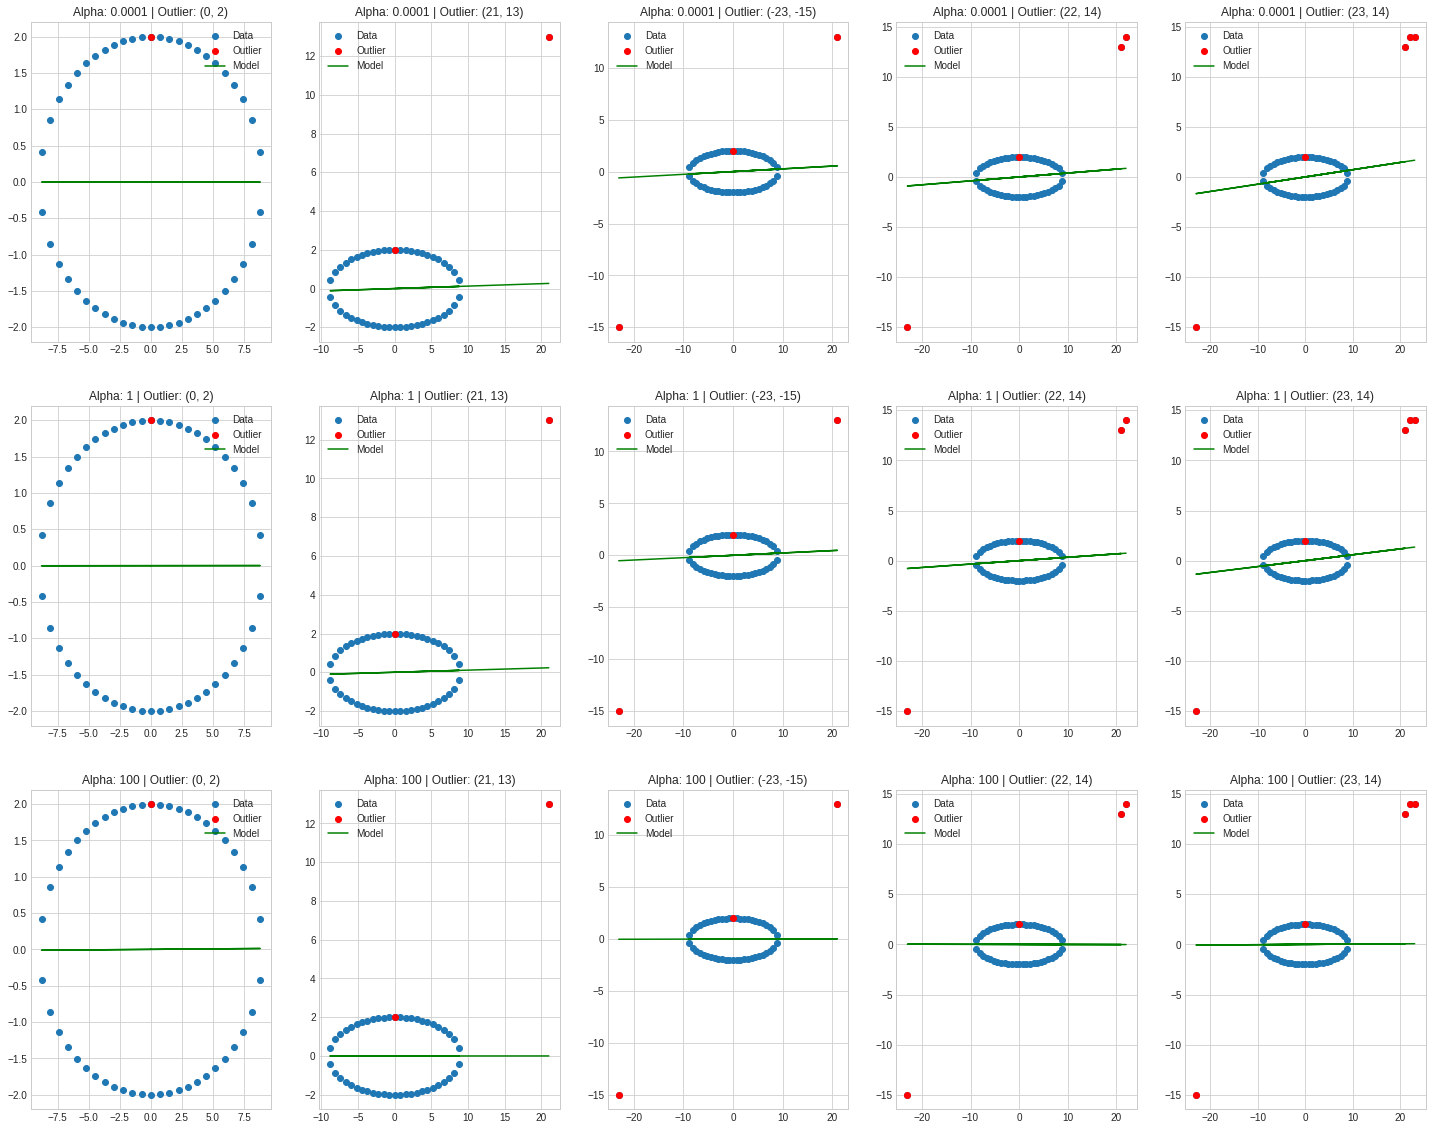

In [11]:
obtain_grid_plot(a=2, b=9, regparams=regparams, outliers=outliers, loss='huber')

__Conclusion:__

In the plot, the red points are outliers, the green line is a learning model and the blue points are acutal datapoints.

When we use `huber` as our loss, we __do not__ see that the hyperplane is getting influenced by outliers.

With this, we can say that, regressor model which uses `huber` as loss function turns out to be robust to outliers.

---

__`loss = 'epsilon_insensitive'`__

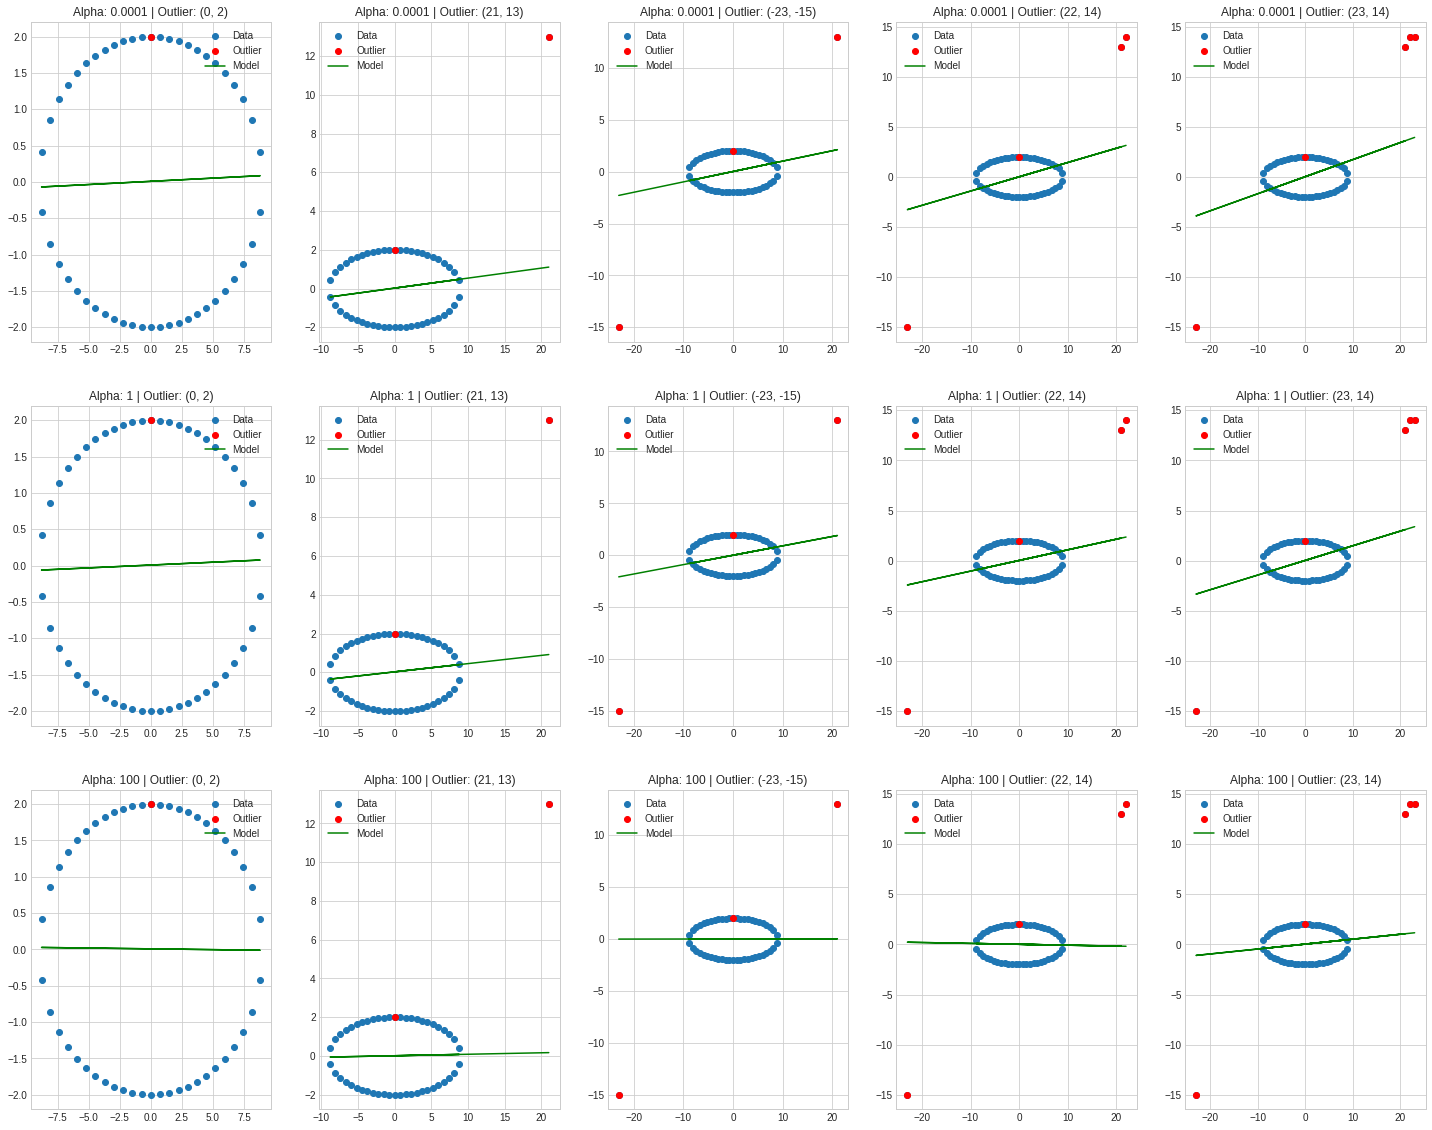

In [12]:
obtain_grid_plot(a=2, b=9, regparams=regparams, outliers=outliers, loss='epsilon_insensitive')

__Conclusion:__

In the plot, the red points are outliers, the green line is a learning model and the blue points are acutal datapoints.

When we use `epsilon_insensitive` as our loss, we see that the hyperplane is only __slightly__ getting influenced by outliers.

As the `alpha` grows, the learning model is getting less impacted by outliers.

---

__`loss = 'squared_epsilon_insensitive'`__

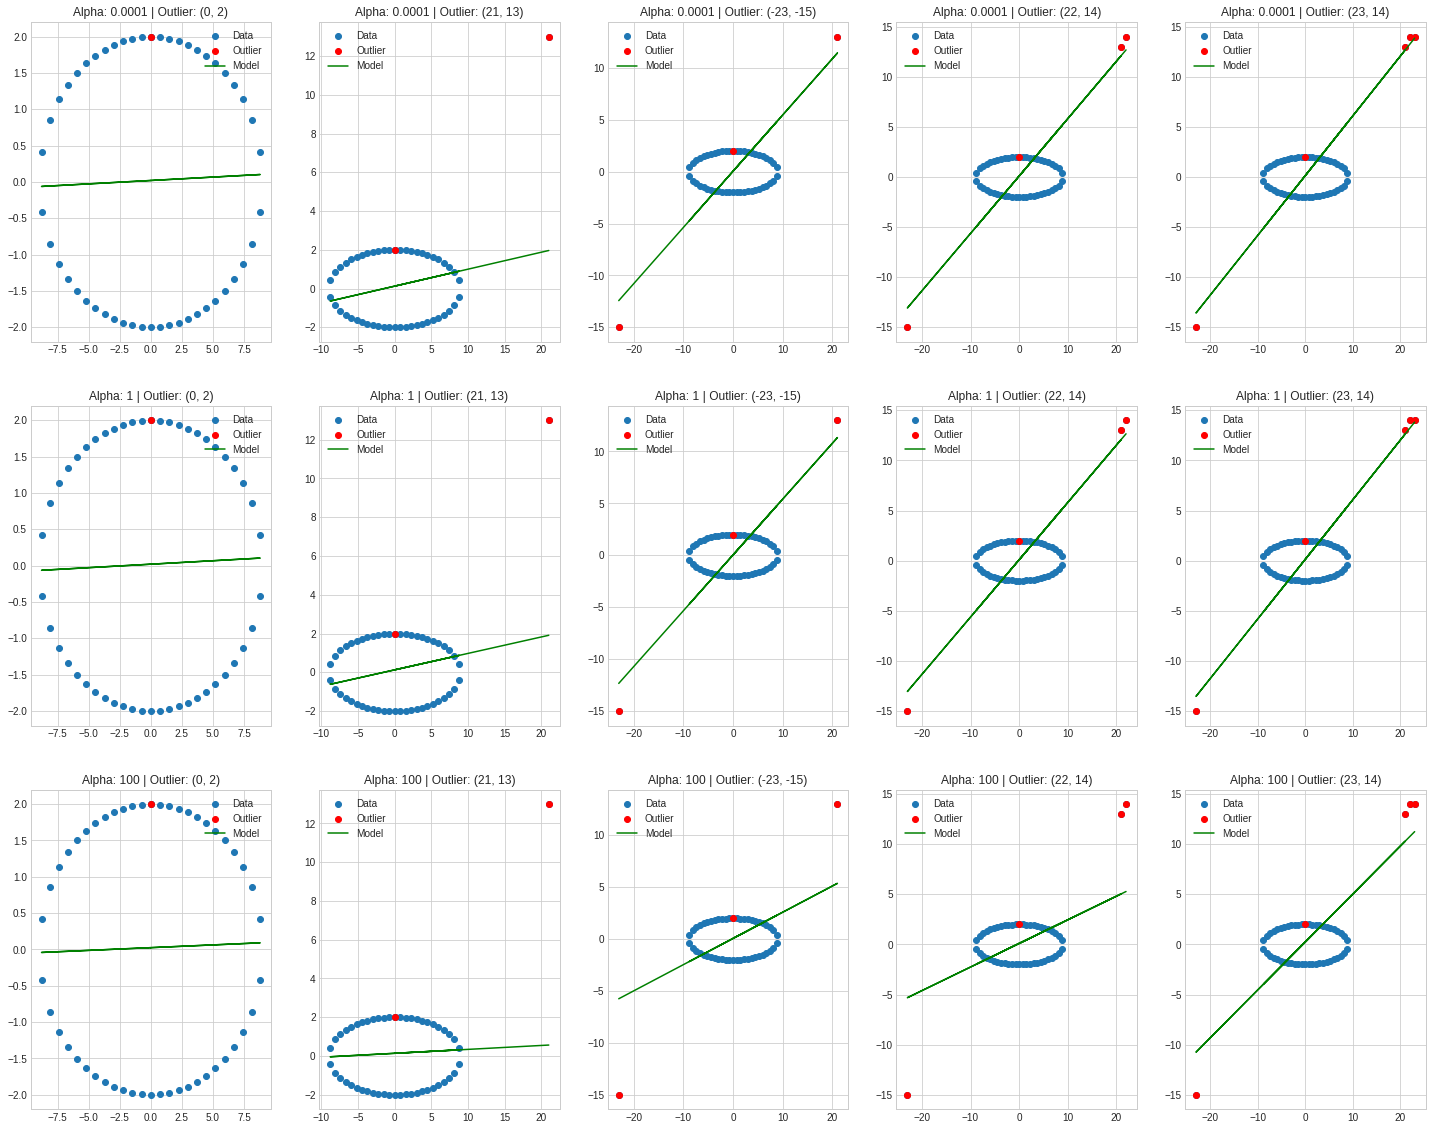

In [13]:
obtain_grid_plot(a=2, b=9, regparams=regparams, outliers=outliers, loss='squared_epsilon_insensitive')

__Conclusion:__

In the plot, the red points are outliers, the green line is a learning model and the blue points are acutal datapoints.

When we use `squared_epsilon_insensitive` as our loss, we see that the hyperplane is getting influenced by outliers after tolerating distance of epsilon.

The outlier points which are in the corners of the plot, impacts the learning model which results in different weight values.

In this case, even the regularizing parameter `alpha` is not holding the tight grip against outliers.

---

End of the file.